In [1]:
import pandas as pd

# Load dataset (Assuming CSV file, modify path as needed)
file_path = "/content/Bangalore_1Day_NETC.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Remove the date from 'initiated_time' (keeping only time)
df['initiated_time'] = df['initiated_time'].str.split().str[-1]

# Fix text inconsistencies
df['merchant_sub_type'] = df['merchant_sub_type'].str.strip().str.capitalize()
df['city'] = df['city'].str.replace("Â", "", regex=True).str.strip()

df['state'] = df['state'].str.strip()

# Handle missing values (Drop rows with critical missing values)

# Remove duplicates
df = df.drop_duplicates()

# Convert categorical columns to lowercase for consistency
df['direction'] = df['direction'].str.upper()
df['vehicle_comvehicle'] = df['vehicle_comvehicle'].str.upper()

df['merchant_name'] = df['merchant_name'].str.title()
df['lane'] = df['lane'].str.upper()
df['vehicle_class_code'] = df['vehicle_class_code'].str.upper()

df['merchant_sub_type'] = df['merchant_sub_type'].str.title()
df['city'] = df['city'].str.title()
df['state'] = df['state'].str.title()

# Convert inn_rr_time_sec to minutes
df['inn_rr_time_min'] = df['inn_rr_time_sec'] / 60

# Save cleaned dataset
df.to_csv("cleaned_toll_data.csv", index=False)

# Display cleaned dataset head
df.head()


,slno.,merchant_name,direction,lane,tag_id,vehicle_regn_number,txn_amount,initiated_time,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state,inn_rr_time_min
0,1,Bannerghatta Road (P2) Plaza,S,P2BX2,HXYUH,YFUNB,225,21:54,994,VC4,F,"12.850056,77.588333",State,Bengaluru,Karnataka,16.566667
1,2,Bannerghatta Road (P2) Plaza,S,P2BX2,JGEFQ,GQHLZ,225,18:59,4528,VC20,T,"12.850056,77.588333",State,Bengaluru,Karnataka,75.466667
2,3,Bannerghatta Road (P2) Plaza,S,P2BX2,VOAPH,DNTMI,150,00:14,134,VC5,F,"12.850056,77.588333",State,Bengaluru,Karnataka,2.233333
3,4,Kadathanamale Toll Plaza,S,LANE09,XBANK,ZMAOY,35,18:19,80,VC20,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,1.333333
4,5,Kadathanamale Toll Plaza,S,LANE10,HMWDZ,IDSRZ,20,15:03,64,VC4,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,1.066667


In [2]:
df.shape

(367074, 16)

In [3]:
new_df = pd.read_csv(file_path)
new_df.shape

(367074, 15)

In [9]:
df = pd.read_csv("/content/cleaned_toll_data.csv")
df.head()

,slno.,merchant_name,direction,lane,tag_id,vehicle_regn_number,txn_amount,initiated_time,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state,inn_rr_time_min
0,1,Bannerghatta Road (P2) Plaza,S,P2BX2,HXYUH,YFUNB,225,21:54,994,VC4,F,"12.850056,77.588333",State,Bengaluru,Karnataka,16.566667
1,2,Bannerghatta Road (P2) Plaza,S,P2BX2,JGEFQ,GQHLZ,225,18:59,4528,VC20,T,"12.850056,77.588333",State,Bengaluru,Karnataka,75.466667
2,3,Bannerghatta Road (P2) Plaza,S,P2BX2,VOAPH,DNTMI,150,00:14,134,VC5,F,"12.850056,77.588333",State,Bengaluru,Karnataka,2.233333
3,4,Kadathanamale Toll Plaza,S,LANE09,XBANK,ZMAOY,35,18:19,80,VC20,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,1.333333
4,5,Kadathanamale Toll Plaza,S,LANE10,HMWDZ,IDSRZ,20,15:03,64,VC4,F,"13.2123515,77.5535138",State,Bangalore,Karnataka,1.066667


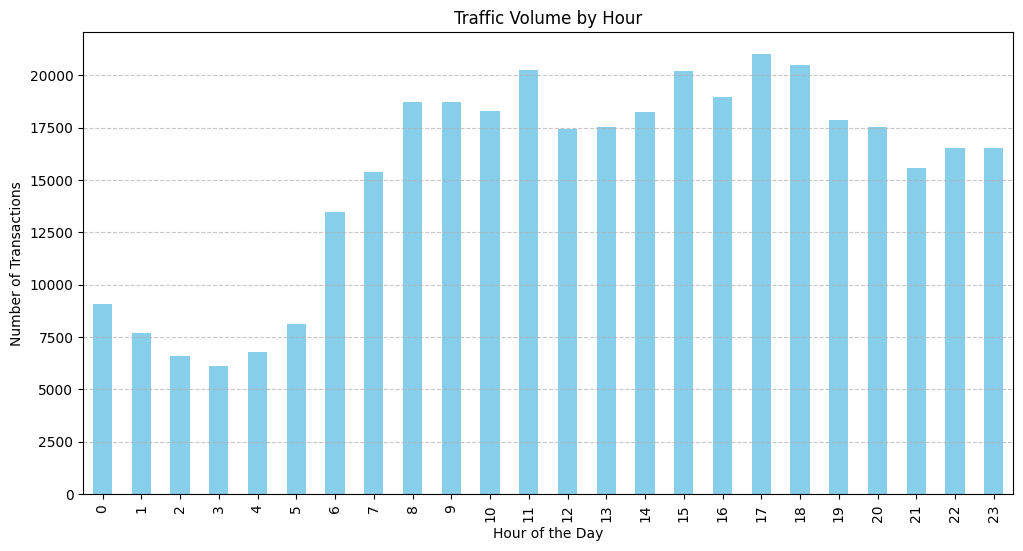

<ipython-input-19-73d46f299ffb>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="peak_hour_category", data=df, ax=axes[0, 0], palette="coolwarm")
<ipython-input-19-73d46f299ffb>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="lane", y="avg_wait_time_sec", data=lane_efficiency, ax=axes[0, 1], palette="viridis")
<ipython-input-19-73d46f299ffb>:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
<ipython-input-19-73d46f299ffb>:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() 

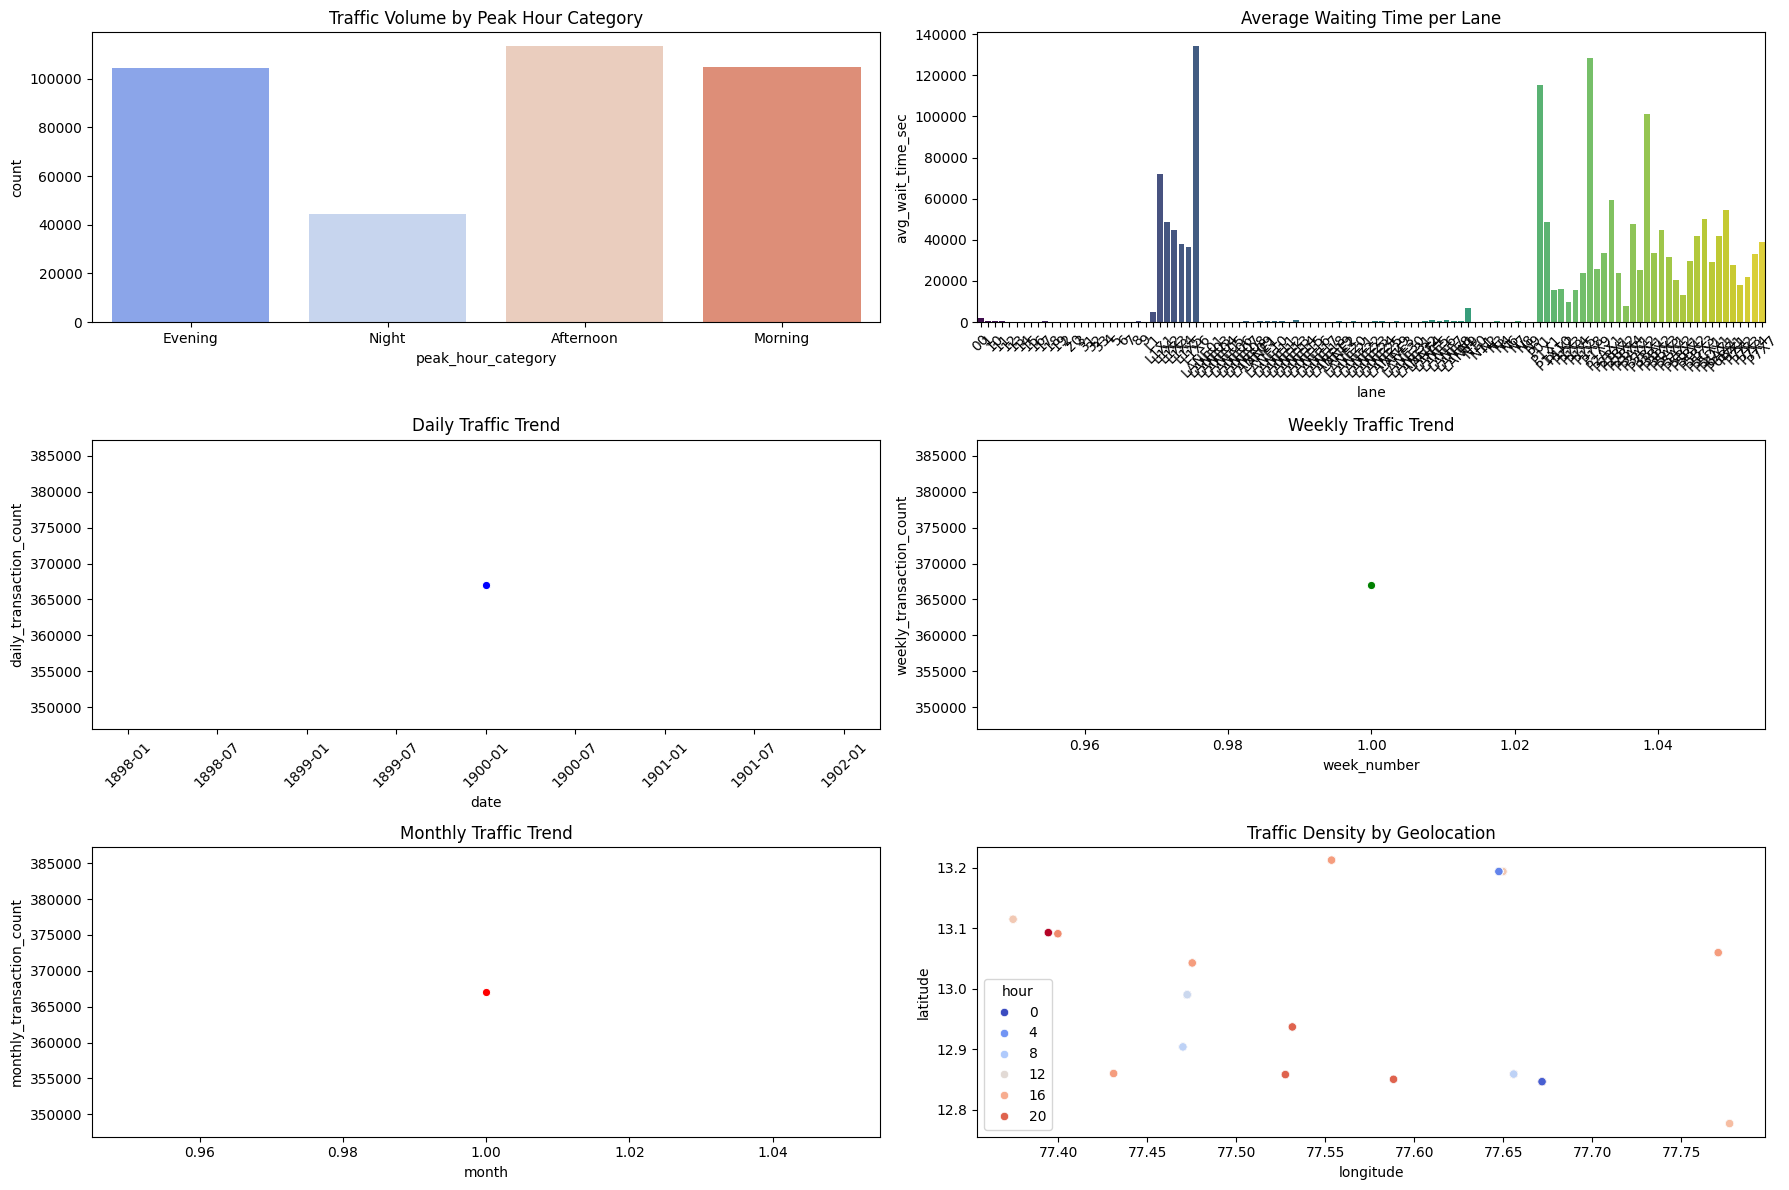

Feature Engineering Complete! Processed dataset saved.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/cleaned_toll_data.csv")

# Standardize column names
df.columns = df.columns.str.replace('.', '', regex=False).str.strip()

# Convert initiated_time to datetime
df["initiated_time"] = pd.to_datetime(df["initiated_time"], format="%H:%M", errors='coerce')

# Extract hour from time
df["hour"] = df["initiated_time"].dt.hour

# Categorize peak hours
def categorize_time(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Night"

df["peak_hour_category"] = df["hour"].apply(categorize_time)

# Compute average waiting time per lane
if "inn_rr_time_sec" in df.columns and "lane" in df.columns:
    lane_efficiency = df.groupby("lane")["inn_rr_time_sec"].mean().reset_index()
    lane_efficiency.rename(columns={"inn_rr_time_sec": "avg_wait_time_sec"}, inplace=True)
    df = df.merge(lane_efficiency, on="lane", how="left")

# Extract Date, Week, and Month
df["date"] = df["initiated_time"].dt.date
df["week_number"] = df["initiated_time"].dt.isocalendar().week
df["month"] = df["initiated_time"].dt.month

# Extract latitude and longitude
if "geocode" in df.columns:
    df[['latitude', 'longitude']] = df['geocode'].str.split(',', expand=True)
    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
    df.drop(columns=["geocode"], inplace=True)

# Aggregate transactions per day, week, and month
if "slno" in df.columns:
    daily_traffic = df.groupby("date")["slno"].count().reset_index()
    daily_traffic.rename(columns={"slno": "daily_transaction_count"}, inplace=True)

    weekly_traffic = df.groupby("week_number")["slno"].count().reset_index()
    weekly_traffic.rename(columns={"slno": "weekly_transaction_count"}, inplace=True)

    monthly_traffic = df.groupby("month")["slno"].count().reset_index()
    monthly_traffic.rename(columns={"slno": "monthly_transaction_count"}, inplace=True)

# Save the updated dataset
df.to_csv("processed_dataset.csv", index=False)

# Plot traffic trends
plt.figure(figsize=(12, 6))
df["hour"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.title("Traffic Volume by Hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Additional Plots
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# 1. Traffic volume by peak hour category
sns.countplot(x="peak_hour_category", data=df, ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title("Traffic Volume by Peak Hour Category")

# 2. Average waiting time per lane
sns.barplot(x="lane", y="avg_wait_time_sec", data=lane_efficiency, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Average Waiting Time per Lane")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# 3. Daily traffic trend
sns.lineplot(x="date", y="daily_transaction_count", data=daily_traffic, ax=axes[1, 0], marker="o", color="b")
axes[1, 0].set_title("Daily Traffic Trend")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# 4. Weekly traffic trend
sns.lineplot(x="week_number", y="weekly_transaction_count", data=weekly_traffic, ax=axes[1, 1], marker="o", color="g")
axes[1, 1].set_title("Weekly Traffic Trend")

# 5. Monthly traffic trend
sns.lineplot(x="month", y="monthly_transaction_count", data=monthly_traffic, ax=axes[2, 0], marker="o", color="r")
axes[2, 0].set_title("Monthly Traffic Trend")

# 6. Scatter plot of traffic density by geolocation
sns.scatterplot(x="longitude", y="latitude", hue=df["hour"], data=df, palette="coolwarm", ax=axes[2, 1])
axes[2, 1].set_title("Traffic Density by Geolocation")

plt.tight_layout()
plt.show()

print("Feature Engineering Complete! Processed dataset saved.")


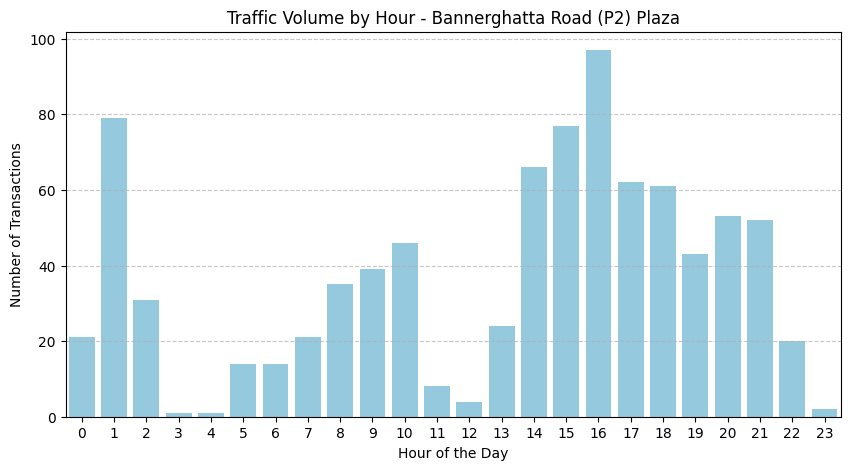

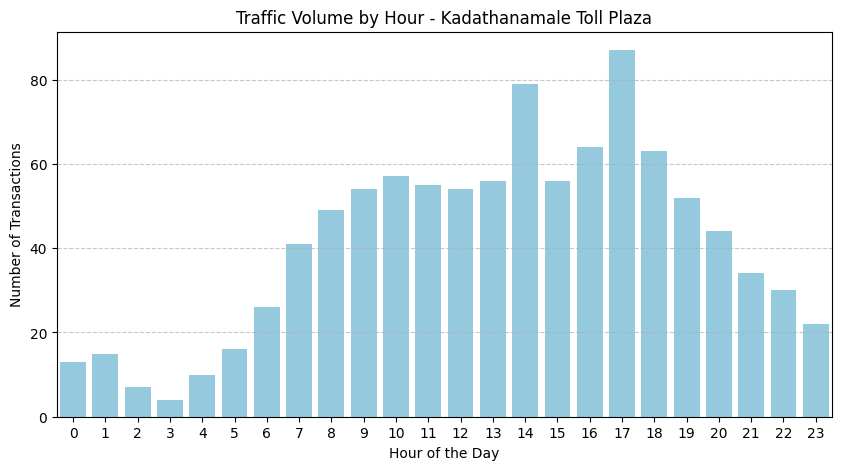

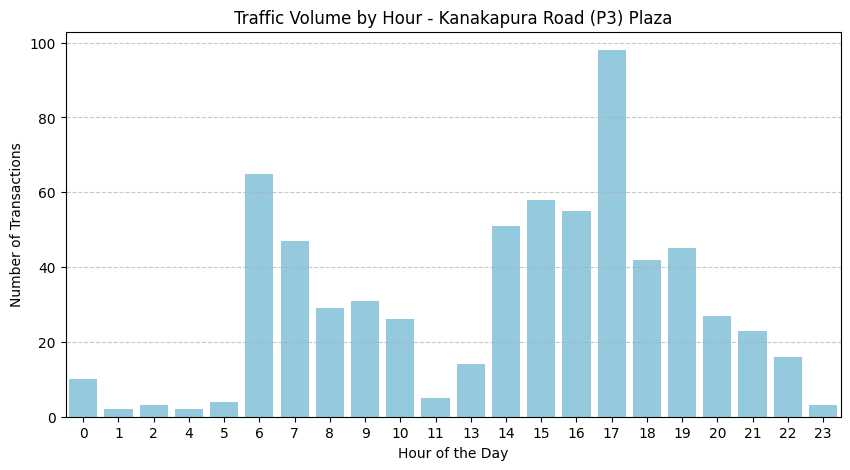

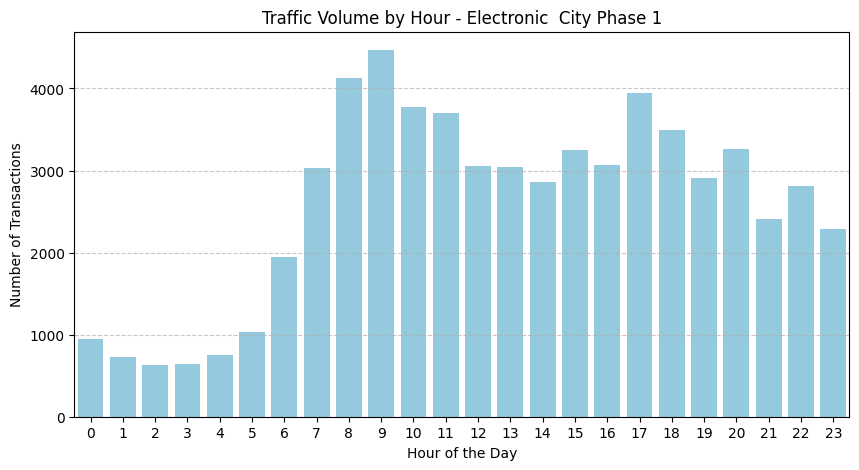

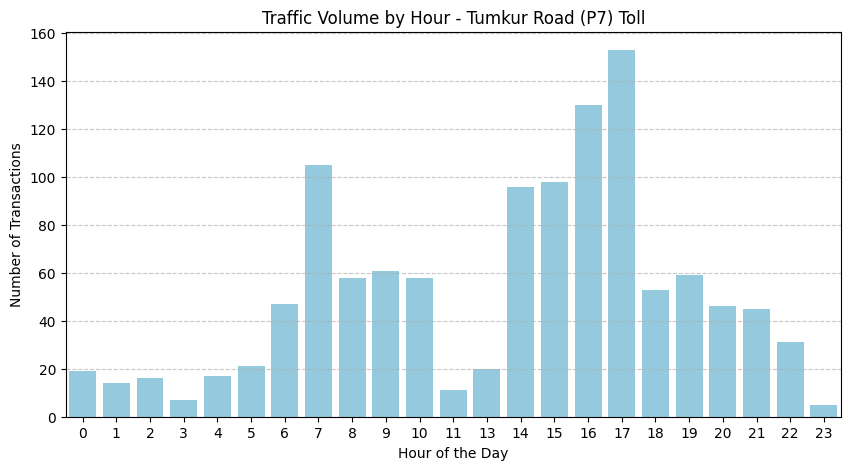

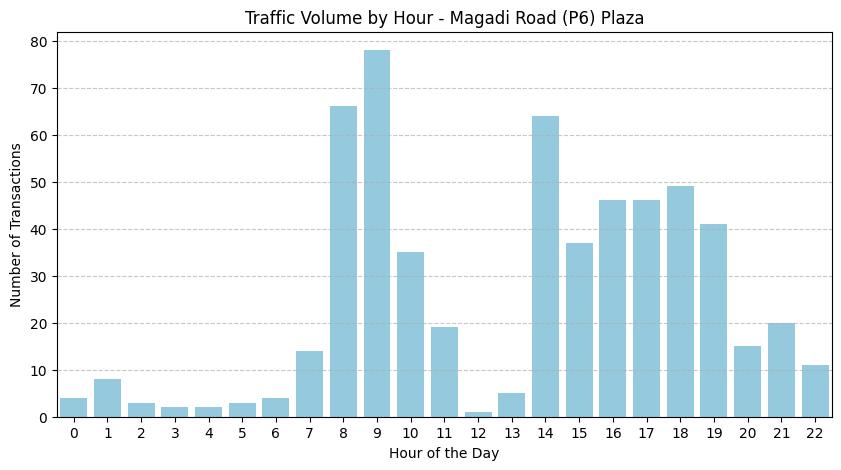

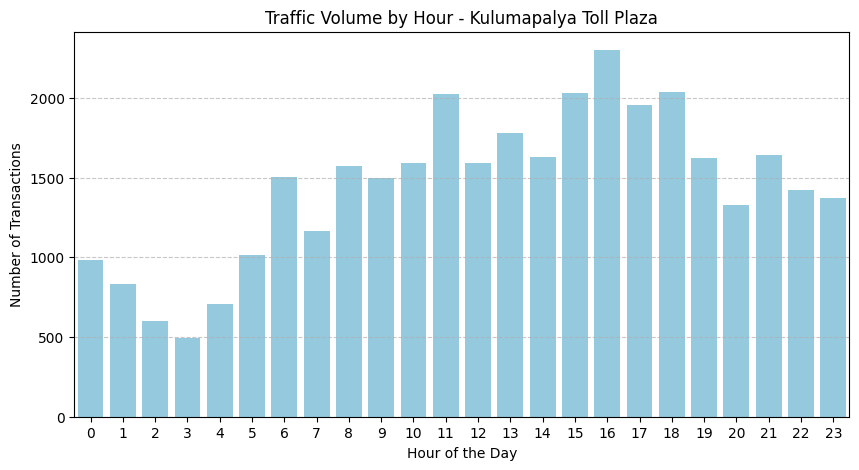

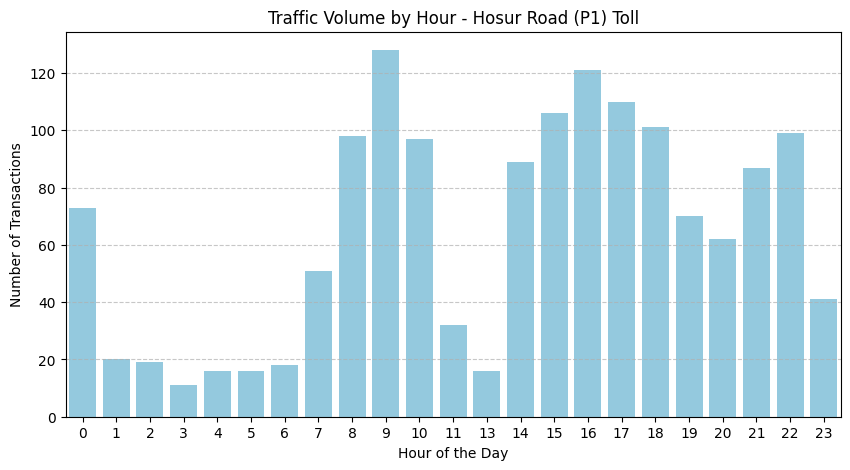

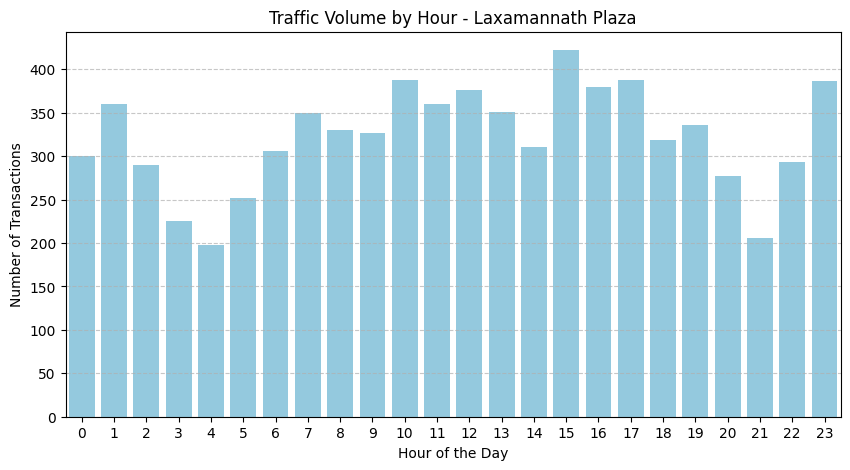

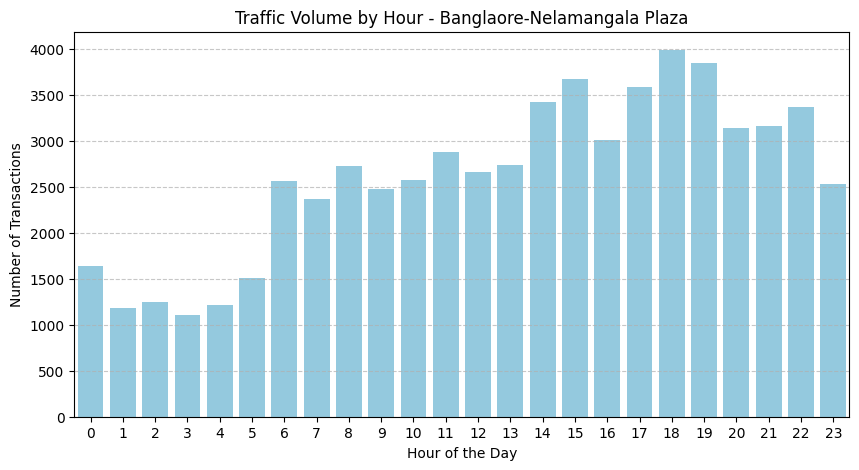

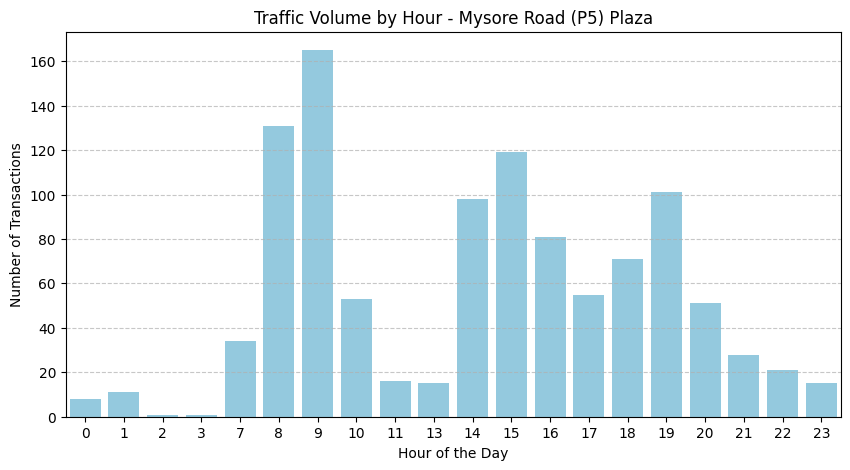

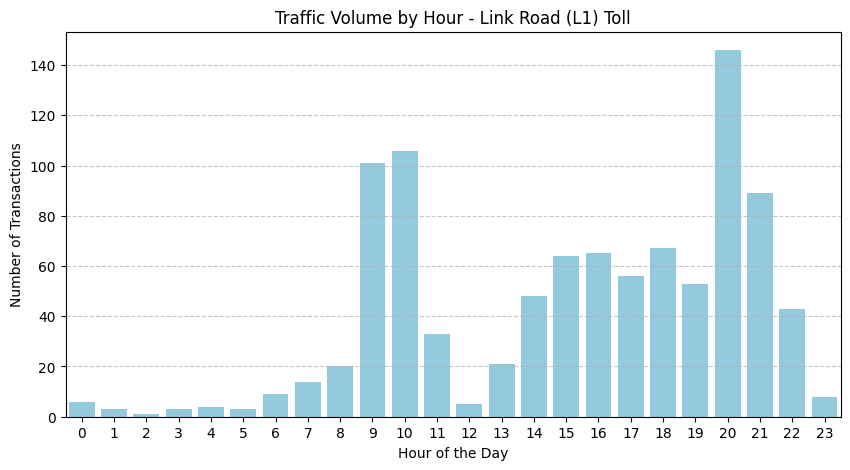

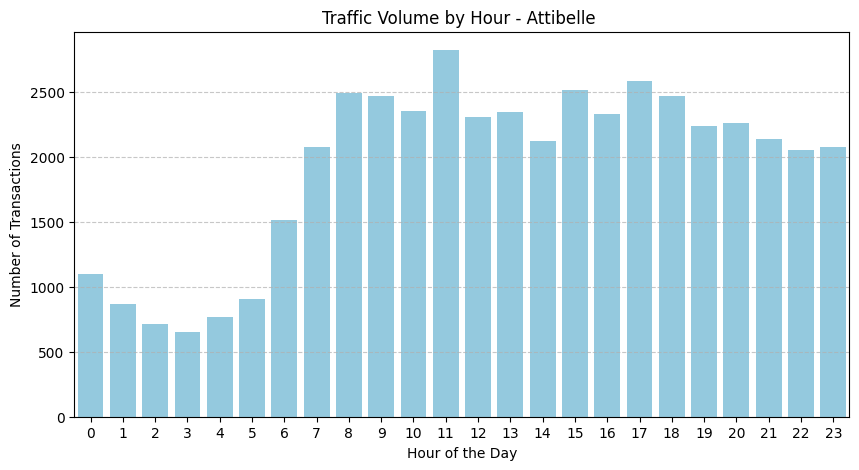

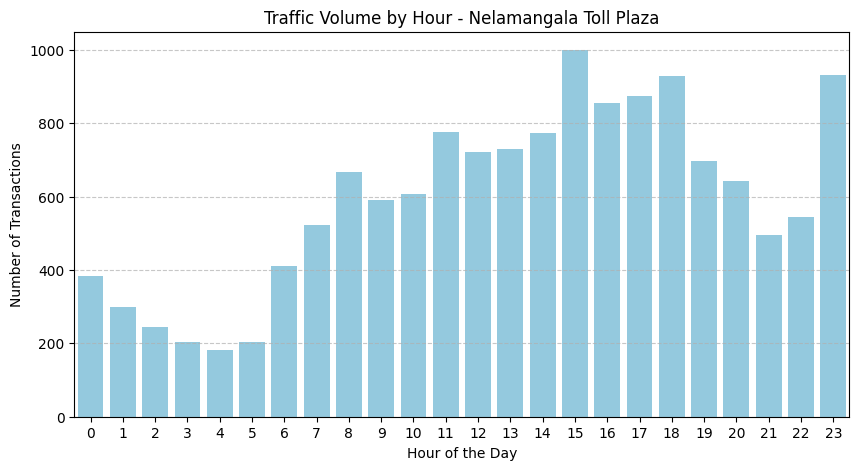

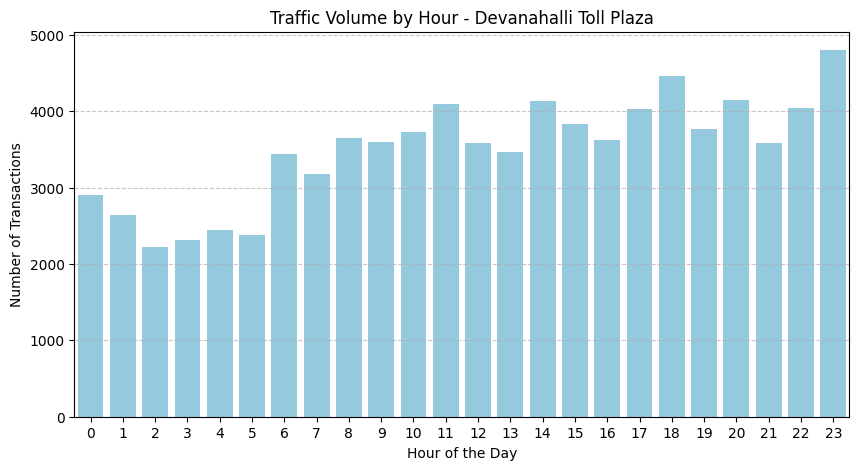

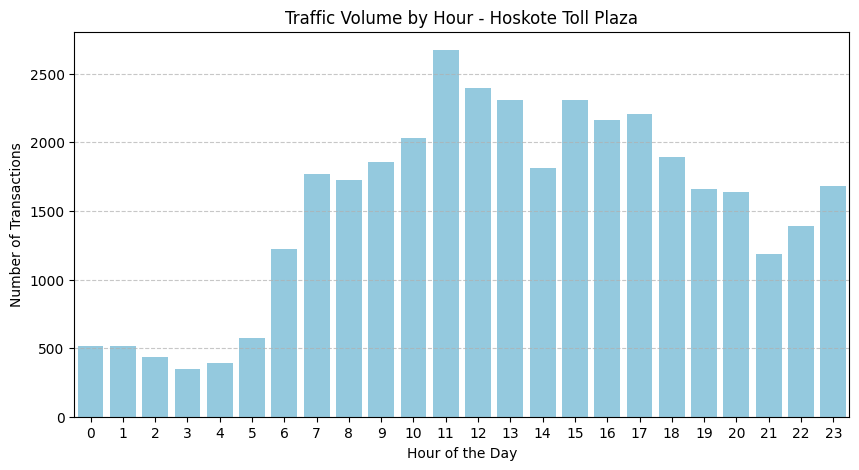

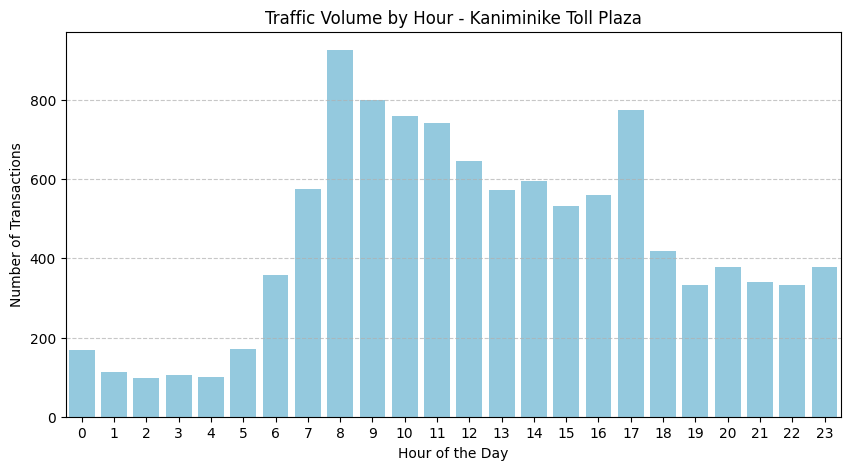

In [21]:
# Plot traffic volume trend for each toll plaza separately
unique_toll_plazas = df["merchant_name"].unique()

for plaza in unique_toll_plazas:
    plt.figure(figsize=(10, 5))
    plaza_data = df[df["merchant_name"] == plaza]
    sns.barplot(x="hour", y="slno", data=plaza_data, estimator=len, color="skyblue")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of Transactions")
    plt.title(f"Traffic Volume by Hour - {plaza}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [22]:
import folium
from folium.plugins import HeatMap

# Ensure latitude and longitude are available
df = df.dropna(subset=["latitude", "longitude"])

# Create a base map centered around the mean location of all toll plazas
map_center = [df["latitude"].mean(), df["longitude"].mean()]
heatmap_map = folium.Map(location=map_center, zoom_start=10)

# Prepare data for HeatMap (latitude, longitude, and weight based on traffic count)
heat_data = df.groupby(["latitude", "longitude"])["slno"].count().reset_index()
heat_data = heat_data.values.tolist()  # Convert to list format required for HeatMap

# Add heatmap layer
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(heatmap_map)

# Display map
heatmap_map.save("traffic_heatmap.html")
print("Heatmap saved as traffic_heatmap.html. Open it in a browser.")


Heatmap saved as traffic_heatmap.html. Open it in a browser.


In [23]:
# Convert initiated_time to datetime and extract the hour
df['initiated_time'] = pd.to_datetime(df['initiated_time'], format='%H:%M', errors='coerce')
df['hour'] = df['initiated_time'].dt.hour

# Group by toll plaza and hour to find traffic trends
traffic_by_hour = df.groupby(['merchant_name', 'hour']).size().reset_index(name='vehicle_count')

# Identify peak hours per toll plaza (top 25% of traffic hours as peak)
def identify_peak_hours(sub_df):
    threshold = sub_df['vehicle_count'].quantile(0.75)  # Top 25% as peak hours
    sub_df['is_peak'] = sub_df['vehicle_count'] >= threshold
    return sub_df

traffic_by_hour = traffic_by_hour.groupby('merchant_name', group_keys=False).apply(identify_peak_hours)

# Calculate revenue impact of 5% discount on non-peak hours
df = df.merge(traffic_by_hour[['merchant_name', 'hour', 'is_peak']], on=['merchant_name', 'hour'], how='left')
df['discounted_amount'] = df['txn_amount'] * 0.95  # 5% discount

# Revenue calculations
total_revenue = df['txn_amount'].sum()
non_peak_revenue_loss = df.loc[~df['is_peak'], 'txn_amount'].sum() * 0.05  # 5% loss only on non-peak transactions

# Percentage of vehicles traveling during non-peak hours
non_peak_vehicle_percentage = df.loc[~df['is_peak']].shape[0] / df.shape[0] * 100

# Summarize results
analysis_summary = {
    "Total Revenue": total_revenue,
    "Revenue Loss with 5% Discount on Non-Peak Hours": non_peak_revenue_loss,
    "Percentage of Vehicles in Non-Peak Hours": non_peak_vehicle_percentage
}

analysis_summary


<ipython-input-23-2ee9c667329c>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  traffic_by_hour = traffic_by_hour.groupby('merchant_name', group_keys=False).apply(identify_peak_hours)


{'Total Revenue': 30365023,
 'Revenue Loss with 5% Discount on Non-Peak Hours': 1025118.75,
 'Percentage of Vehicles in Non-Peak Hours': 64.83433858023177}

In [24]:
# Group data by toll plaza for detailed report
toll_report = df.groupby(['merchant_name', 'is_peak']).agg(
    total_vehicles=('txn_amount', 'count'),
    total_revenue=('txn_amount', 'sum'),
    revenue_loss=('txn_amount', lambda x: x.sum() * 0.05)  # 5% discount on non-peak transactions
).reset_index()

# Pivot for better readability
toll_report_pivot = toll_report.pivot(index='merchant_name', columns='is_peak', values=['total_vehicles', 'total_revenue', 'revenue_loss'])

# Rename columns for clarity
toll_report_pivot.columns = ['Vehicles (Non-Peak)', 'Vehicles (Peak)', 'Revenue (Non-Peak)', 'Revenue (Peak)', 'Loss (Non-Peak)', 'Loss (Peak)']
toll_report_pivot = toll_report_pivot.fillna(0).reset_index()

# Generate a summary report
toll_report_pivot.head()


,merchant_name,Vehicles (Non-Peak),Vehicles (Peak),Revenue (Non-Peak),Revenue (Peak),Loss (Non-Peak),Loss (Peak)
0,Attibelle,30818.0,15347.0,2303632.0,884384.0,115181.60,44219.2
1,Banglaore-Nelamangala Plaza,40769.0,21900.0,1965037.0,834884.0,98251.85,41744.2
2,Bannerghatta Road (P2) Plaza,429.0,442.0,63270.0,66750.0,3163.50,3337.5
3,Devanahalli Toll Plaza,58402.0,25670.0,7283672.0,3117662.0,364183.60,155883.1
4,Electronic City Phase 1,38674.0,23502.0,2662511.0,1429538.0,133125.55,71476.9


<Figure size 1200x600 with 0 Axes>

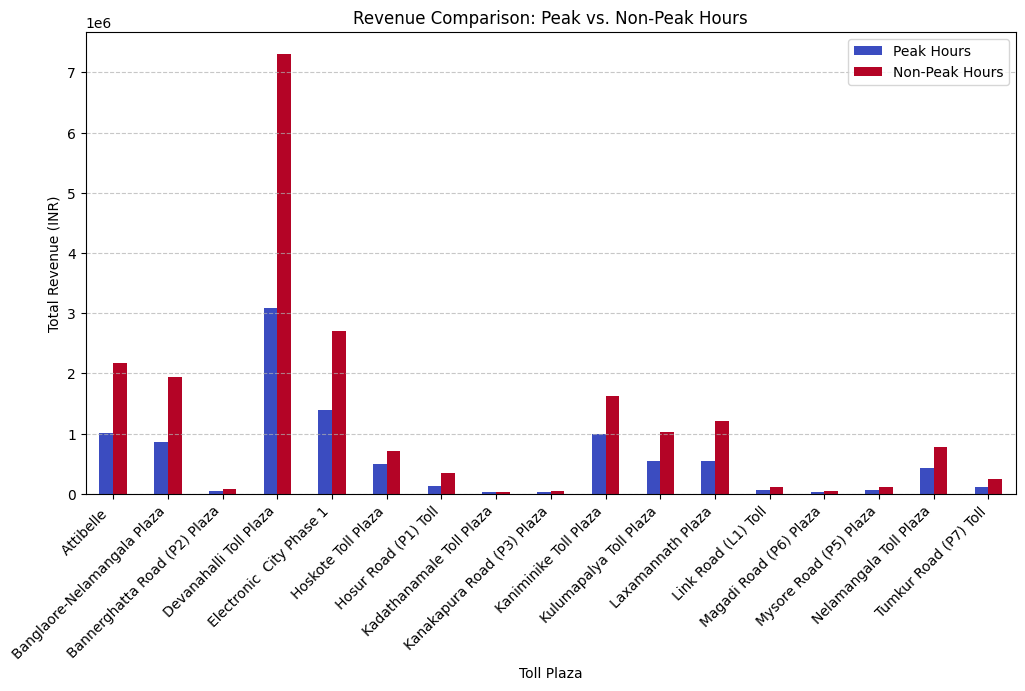

<Figure size 1200x600 with 0 Axes>

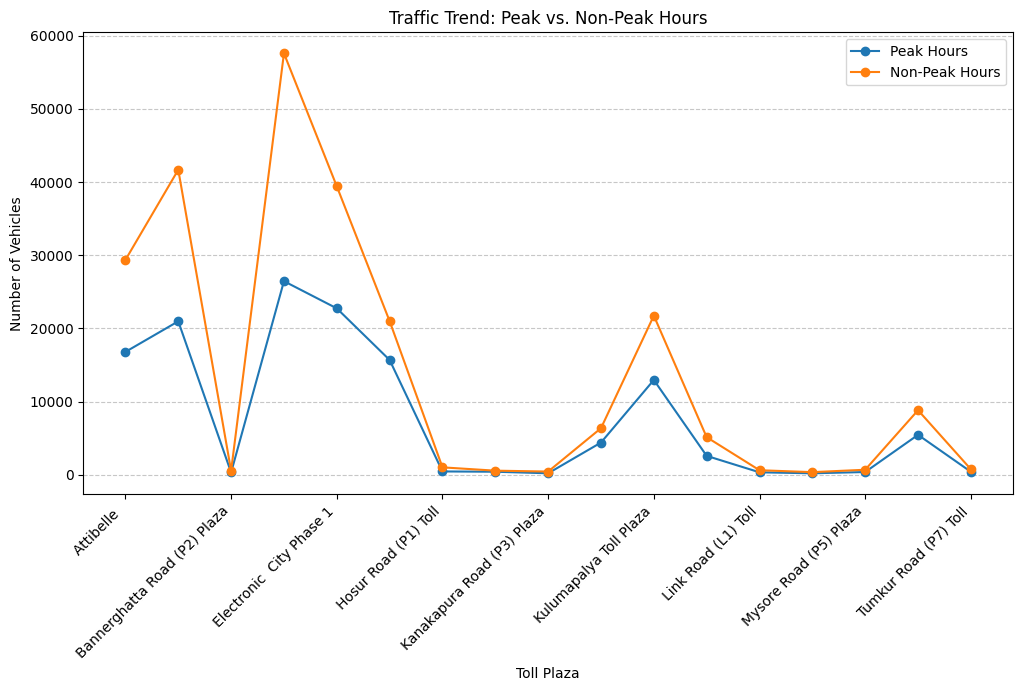

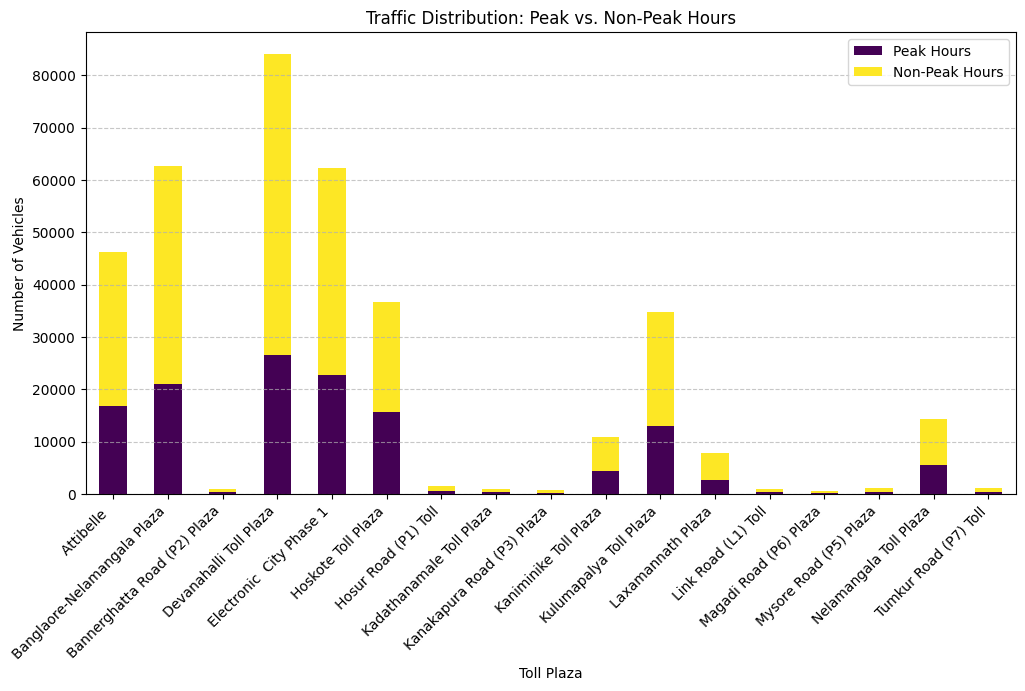

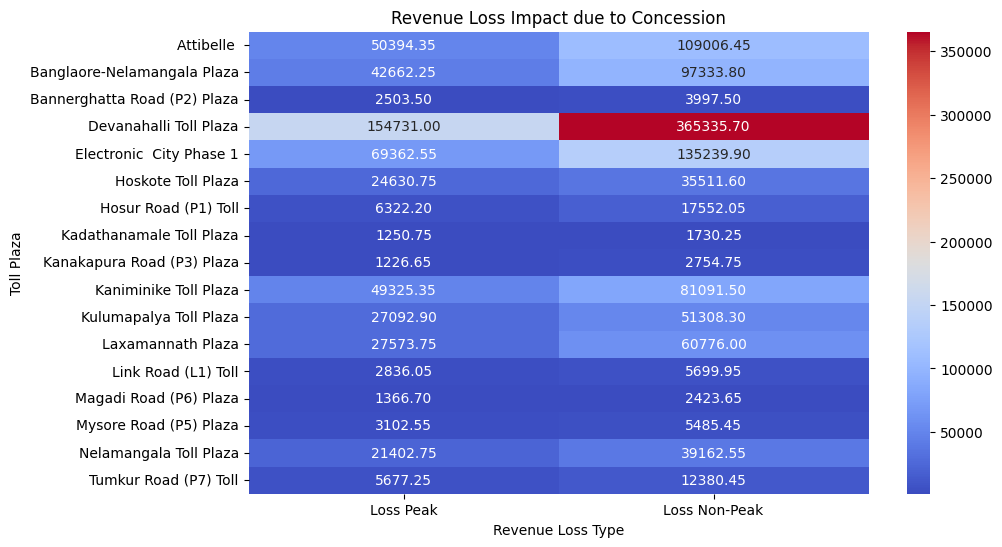

<ipython-input-29-469a9053f790>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["time_category"], y=df["txn_amount"], palette="coolwarm")


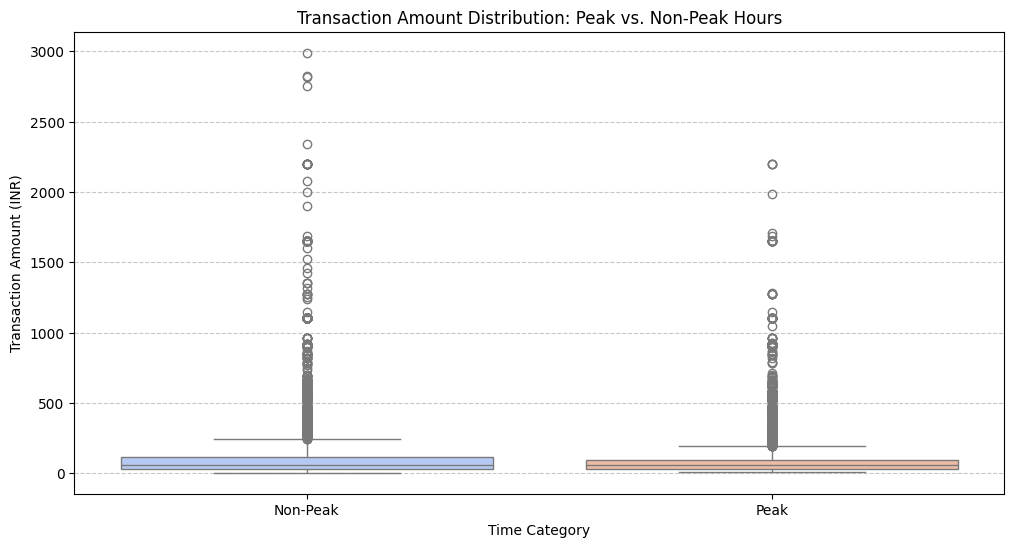

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
file_path = "/content/cleaned_toll_data.csv"
df = pd.read_csv(file_path)

# Convert initiated_time to datetime for proper time analysis
df["initiated_time"] = pd.to_datetime(df["initiated_time"], format="%H:%M", errors='coerce')
df["hour"] = df["initiated_time"].dt.hour

# Categorize peak and non-peak hours (Assumed peak hours: 10 AM - 5 PM)
def categorize_peak(hour):
    return "Peak" if 10 <= hour < 17 else "Non-Peak"

df["time_category"] = df["hour"].apply(categorize_peak)

# Compute traffic and revenue for each toll plaza in peak vs. non-peak hours
toll_analysis = df.groupby(["merchant_name", "time_category"]).agg(
    vehicles=("slno.", "count"),
    revenue=("txn_amount", "sum")
).reset_index()

# Pivot data for visualization
toll_pivot = toll_analysis.pivot(index="merchant_name", columns="time_category", values=["vehicles", "revenue"])
toll_pivot.columns = ['_'.join(col).strip() for col in toll_pivot.columns.values]  # Flatten column names
toll_pivot = toll_pivot.fillna(0).reset_index()

# Calculate revenue loss due to 5% discount on non-peak transactions
toll_pivot["loss_non_peak"] = toll_pivot["revenue_Non-Peak"] * 0.05
toll_pivot["loss_peak"] = toll_pivot["revenue_Peak"] * 0.05

# --- 1. Bar Chart: Peak vs. Non-Peak Revenue ---
plt.figure(figsize=(12, 6))
toll_pivot.plot(x="merchant_name", y=["revenue_Peak", "revenue_Non-Peak"], kind="bar", figsize=(12, 6), colormap="coolwarm")
plt.title("Revenue Comparison: Peak vs. Non-Peak Hours")
plt.xlabel("Toll Plaza")
plt.ylabel("Total Revenue (INR)")
plt.xticks(rotation=45, ha='right')
plt.legend(["Peak Hours", "Non-Peak Hours"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- 2. Line Chart: Traffic Trend (Peak vs. Non-Peak) ---
plt.figure(figsize=(12, 6))
toll_pivot.plot(x="merchant_name", y=["vehicles_Peak", "vehicles_Non-Peak"], kind="line", marker="o", figsize=(12, 6))
plt.title("Traffic Trend: Peak vs. Non-Peak Hours")
plt.xlabel("Toll Plaza")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45, ha='right')
plt.legend(["Peak Hours", "Non-Peak Hours"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- 3. Stacked Bar Chart: Traffic Flow Distribution ---
toll_pivot.set_index("merchant_name")[["vehicles_Peak", "vehicles_Non-Peak"]].plot(
    kind="bar", stacked=True, figsize=(12, 6), colormap="viridis"
)
plt.title("Traffic Distribution: Peak vs. Non-Peak Hours")
plt.xlabel("Toll Plaza")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45, ha='right')
plt.legend(["Peak Hours", "Non-Peak Hours"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- 4. Heatmap: Revenue Loss Impact ---
plt.figure(figsize=(10, 6))
sns.heatmap(toll_pivot[["loss_peak", "loss_non_peak"]], annot=True, fmt=".2f", cmap="coolwarm", xticklabels=["Loss Peak", "Loss Non-Peak"], yticklabels=toll_pivot["merchant_name"])
plt.title("Revenue Loss Impact due to Concession")
plt.ylabel("Toll Plaza")
plt.xlabel("Revenue Loss Type")
plt.show()

# --- 5. Boxplot: Transaction Amount Distribution Over Time ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["time_category"], y=df["txn_amount"], palette="coolwarm")
plt.title("Transaction Amount Distribution: Peak vs. Non-Peak Hours")
plt.xlabel("Time Category")
plt.ylabel("Transaction Amount (INR)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [30]:
# Extract hour from initiated_time
df["hour"] = pd.to_datetime(df["initiated_time"], format="%H:%M", errors="coerce").dt.hour

# Re-run peak/non-peak classification
df["time_category"] = df["hour"].apply(lambda h: "Peak" if 10 <= h < 17 else "Non-Peak")

# Verify the updated dataset
df[["initiated_time", "hour", "time_category"]].head()

,initiated_time,hour,time_category
0,1900-01-01 21:54:00,21,Non-Peak
1,1900-01-01 18:59:00,18,Non-Peak
2,1900-01-01 00:14:00,0,Non-Peak
3,1900-01-01 18:19:00,18,Non-Peak
4,1900-01-01 15:03:00,15,Peak


<ipython-input-41-8edf3d3b1b16>:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["initiated_time"] = pd.to_datetime(df["initiated_time"], errors="coerce")  # Convert to datetime


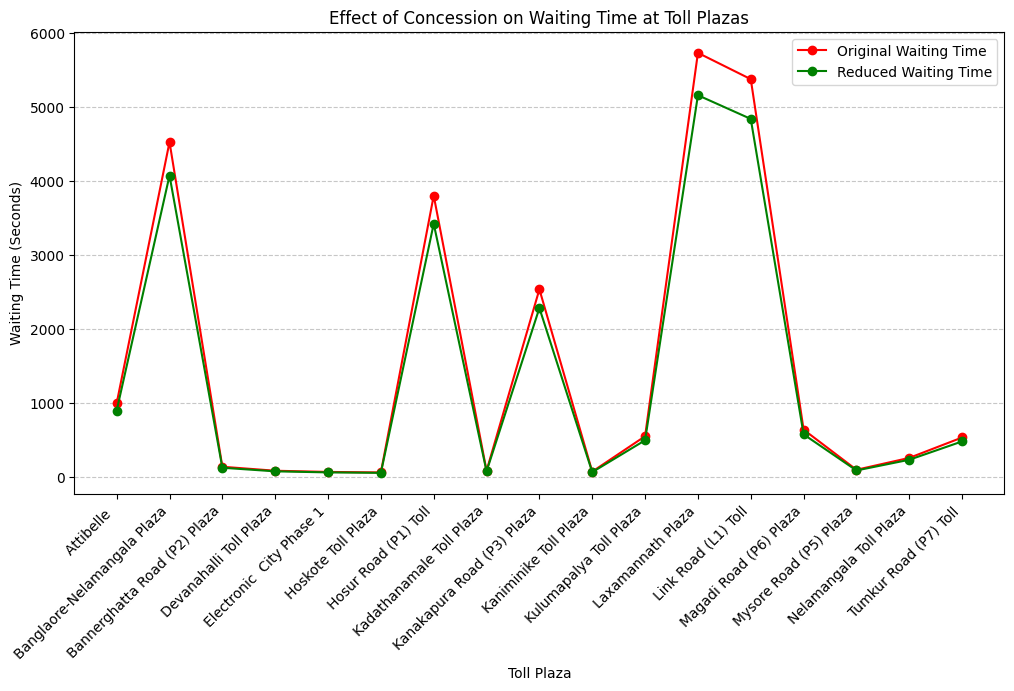

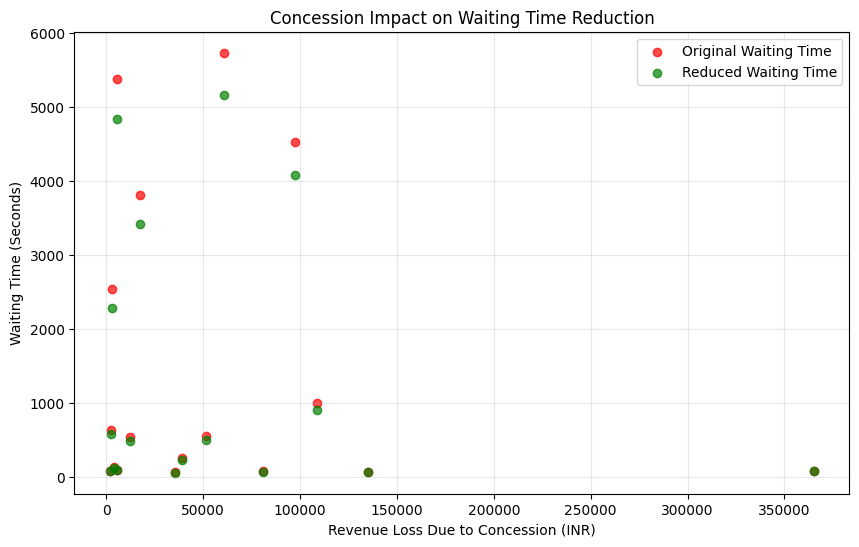

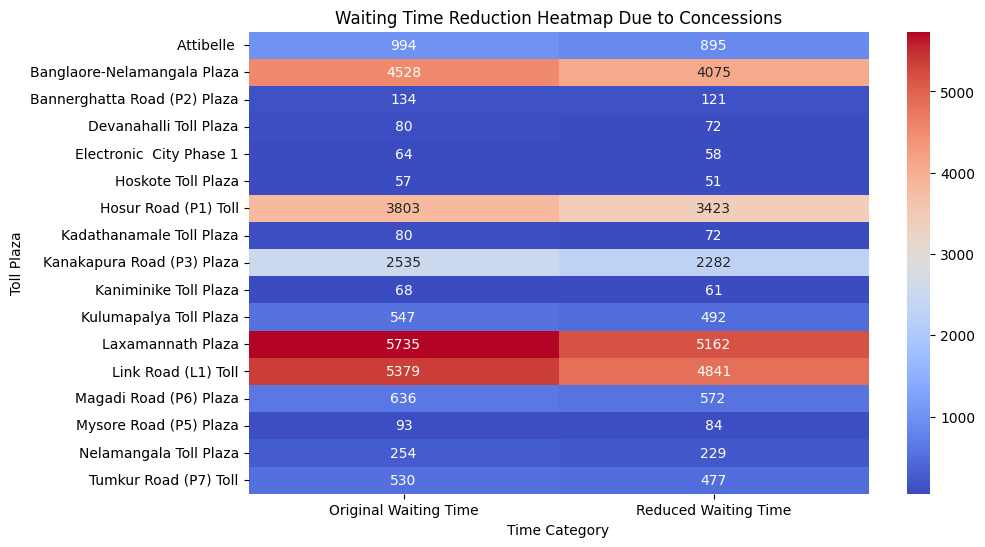

'/toll_waiting_time_reduction_report.csv'

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/cleaned_toll_data.csv"
df = pd.read_csv(file_path)

# Sample waiting time data provided by the user
waiting_times = [
    994, 4528, 134, 80, 64, 57, 3803, 80, 2535, 68, 547, 5735, 5379, 636, 93, 254, 530, 82, 237, 143931,
    6786, 260, 140, 55, 102, 153181, 113013, 180, 115, 4359, 114, 6408, 4079, 152, 282, 67, 225, 115626,
    119, 4659, 72905, 126, 159, 4395, 90, 71, 196, 191, 70, 79, 164, 92, 138, 4738, 4782, 165, 84, 63,
    89, 103, 46, 100, 289, 169, 144, 1578, 173, 100, 237, 2232, 56, 81, 48, 5291, 161, 185, 137, 95, 519,
    53, 106478, 112, 5406, 595, 236, 210, 73, 102545, 89, 101398, 91, 11127, 6386, 3566, 128, 89226, 3182,
    206, 76, 113, 3973, 112, 7430, 91, 208, 75, 138, 3943, 8396, 113627, 52, 85207, 60, 8546, 175936, 107093,
    87, 6084, 149, 119, 140, 1640, 80, 120, 145, 4697, 152, 141096, 174, 184, 74, 248, 80, 86, 79, 76, 4709,
    127709, 230, 90, 128381, 121523, 102, 105, 4334, 9827, 257, 81, 82, 102705, 76, 66, 82, 51, 83, 2237, 161,
    188, 152741, 123, 90, 124, 119485, 88, 233, 74, 103, 168123, 101379, 122, 94, 55, 328, 164, 84, 136, 127,
    71, 3660, 122, 66, 60, 137, 3803, 102, 129, 9623, 133, 117, 292, 130536, 178, 103, 117, 196, 88, 4678, 148,
    231, 78399, 183, 127171, 720, 130948, 81151, 148193, 149, 198, 6176, 3504, 63, 146, 77, 95, 89, 489
]

# Ensure we have enough waiting times for unique toll plazas
unique_toll_plazas = df["merchant_name"].nunique()
waiting_times = waiting_times[:unique_toll_plazas]  # Trim or extend list as needed

# Map waiting times to each toll plaza
df_toll_waiting = df.groupby("merchant_name").size().reset_index(name="count")
df_toll_waiting["waiting_time"] = waiting_times[:len(df_toll_waiting)]

# Categorize peak and non-peak hours
def categorize_peak(hour):
    return "Peak" if 10 <= hour < 17 else "Non-Peak"

df["initiated_time"] = pd.to_datetime(df["initiated_time"], errors="coerce")  # Convert to datetime
df["hour"] = df["initiated_time"].dt.hour  # Extract hour
df["time_category"] = df["hour"].apply(categorize_peak)


# Compute traffic and revenue for each toll plaza in peak vs. non-peak hours
toll_analysis = df.groupby(["merchant_name", "time_category"]).agg(
    vehicles=("tag_id", "count"),
    revenue=("txn_amount", "sum")
).reset_index()

# Pivot data for visualization
toll_pivot = toll_analysis.pivot(index="merchant_name", columns="time_category", values=["vehicles", "revenue"])
toll_pivot.columns = ['_'.join(col).strip() for col in toll_pivot.columns.values]  # Flatten column names
toll_pivot = toll_pivot.fillna(0).reset_index()

# Merge waiting time data
toll_pivot = toll_pivot.merge(df_toll_waiting, on="merchant_name", how="left")

# Calculate revenue loss due to 5% discount on non-peak transactions
toll_pivot["loss_non_peak"] = toll_pivot["revenue_Non-Peak"] * 0.05

# Simulated waiting time reduction model (Assuming 10% reduction per 5% concession)
toll_pivot["reduced_waiting_time"] = toll_pivot["waiting_time"] * (1 - (toll_pivot["loss_non_peak"] / toll_pivot["revenue_Non-Peak"]).fillna(0) * 2)

# --- 1. Line Chart: Reduction in Waiting Time ---
plt.figure(figsize=(12, 6))
plt.plot(toll_pivot["merchant_name"], toll_pivot["waiting_time"], marker="o", label="Original Waiting Time", linestyle="-", color="red")
plt.plot(toll_pivot["merchant_name"], toll_pivot["reduced_waiting_time"], marker="o", label="Reduced Waiting Time", linestyle="-", color="green")
plt.title("Effect of Concession on Waiting Time at Toll Plazas")
plt.xlabel("Toll Plaza")
plt.ylabel("Waiting Time (Seconds)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- 2. Scatter Plot: Revenue Concession vs. Waiting Time Reduction ---
plt.figure(figsize=(10, 6))
plt.scatter(toll_pivot["loss_non_peak"], toll_pivot["waiting_time"], label="Original Waiting Time", color="red", alpha=0.7)
plt.scatter(toll_pivot["loss_non_peak"], toll_pivot["reduced_waiting_time"], label="Reduced Waiting Time", color="green", alpha=0.7)
plt.title("Concession Impact on Waiting Time Reduction")
plt.xlabel("Revenue Loss Due to Concession (INR)")
plt.ylabel("Waiting Time (Seconds)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- 3. Heatmap: Waiting Time Reduction Across Toll Plazas ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    toll_pivot.set_index("merchant_name")[["waiting_time", "reduced_waiting_time"]],
    annot=True, fmt=".0f", cmap="coolwarm",
    xticklabels=["Original Waiting Time", "Reduced Waiting Time"],
    yticklabels=toll_pivot["merchant_name"]
)
plt.title("Waiting Time Reduction Heatmap Due to Concessions")
plt.ylabel("Toll Plaza")
plt.xlabel("Time Category")
plt.show()

# Summary Report
report = toll_pivot[["merchant_name", "waiting_time", "reduced_waiting_time", "loss_non_peak"]].copy()
report["time_saved"] = report["waiting_time"] - report["reduced_waiting_time"]
report["percent_time_reduction"] = (report["time_saved"] / report["waiting_time"]) * 100

# Save report
report_path = "/toll_waiting_time_reduction_report.csv"
report.to_csv(report_path, index=False)
report_path


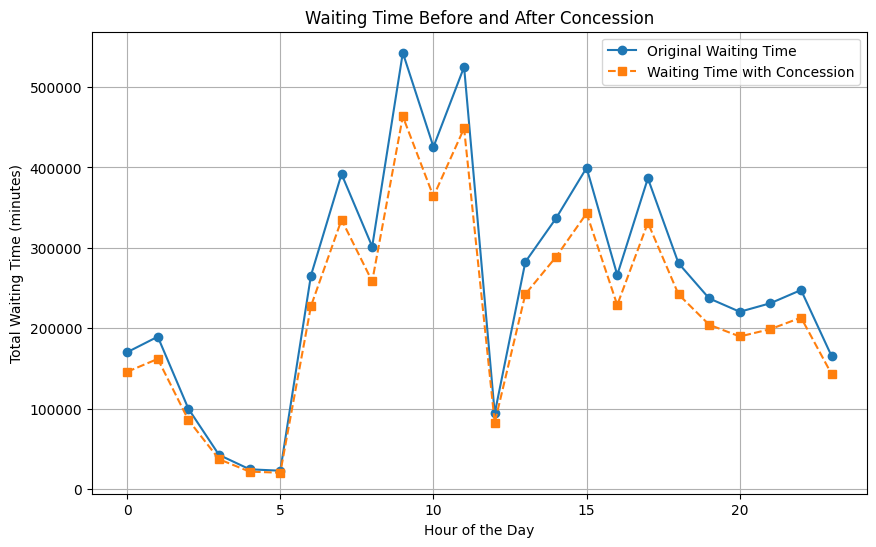

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/cleaned_toll_data.csv"  # Change this to your file path
df = pd.read_csv(file_path)

# Convert 'initiated_time' to datetime and extract the hour
df['hour'] = pd.to_datetime(df['initiated_time'], format='%H:%M').dt.hour

# Calculate waiting time with concession
df['waiting_time_concession'] = df['inn_rr_time_min'].apply(lambda x: x * 0.9 if x <= 50 else x * 0.85)

# Group by hour and sum waiting times
hourly_waiting_time = df.groupby('hour')['inn_rr_time_min'].sum()
hourly_waiting_time_concession = df.groupby('hour')['waiting_time_concession'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(hourly_waiting_time.index, hourly_waiting_time, label="Original Waiting Time", marker='o', linestyle='-')
plt.plot(hourly_waiting_time_concession.index, hourly_waiting_time_concession, label="Waiting Time with Concession", marker='s', linestyle='--')

# Formatting the graph
plt.xlabel("Hour of the Day")
plt.ylabel("Total Waiting Time (minutes)")
plt.title("Waiting Time Before and After Concession")
plt.legend()
plt.grid(True)

# Show plot
plt.show()
